In [6]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [4]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [5]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [24]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

625

In [25]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | longyearbyen
Processing Record 2 of Set 1 | ushuaia
Processing Record 3 of Set 1 | mataura
Processing Record 4 of Set 1 | rikitea
Processing Record 5 of Set 1 | sawakin
Processing Record 6 of Set 1 | kuching
Processing Record 7 of Set 1 | nalut
Processing Record 8 of Set 1 | ilulissat
Processing Record 9 of Set 1 | chandur
Processing Record 10 of Set 1 | vaini
Processing Record 11 of Set 1 | pakwach
City not found. Skipping...
Processing Record 12 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 13 of Set 1 | hongjiang
Processing Record 14 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 15 of Set 1 | hobart
Processing Record 16 of Set 1 | bilibino
Processing Record 17 of Set 1 | sarankhola
Processing Record 18 of Set 1 | codrington
Processing Record 19 of Set 1 | east london
Processing Record 20 of Set 1 | ucluelet
Processing Record 21 of Set 1 | porosozero
Pro

Processing Record 37 of Set 4 | nikolskoye
Processing Record 38 of Set 4 | farafenni
Processing Record 39 of Set 4 | sedelnikovo
City not found. Skipping...
Processing Record 40 of Set 4 | coos bay
Processing Record 41 of Set 4 | leningradskiy
Processing Record 42 of Set 4 | barrow
Processing Record 43 of Set 4 | tura
Processing Record 44 of Set 4 | ankazoabo
Processing Record 45 of Set 4 | shimoda
Processing Record 46 of Set 4 | menongue
Processing Record 47 of Set 4 | new richmond
Processing Record 48 of Set 4 | aflu
City not found. Skipping...
Processing Record 49 of Set 4 | shelburne
Processing Record 50 of Set 4 | iqaluit
Processing Record 1 of Set 5 | eyl
Processing Record 2 of Set 5 | asau
Processing Record 3 of Set 5 | vanderhoof
Processing Record 4 of Set 5 | dunedin
Processing Record 5 of Set 5 | monrovia
Processing Record 6 of Set 5 | ribeira grande
Processing Record 7 of Set 5 | tunduru
City not found. Skipping...
Processing Record 8 of Set 5 | jiblah
Processing Record 9 of

Processing Record 29 of Set 8 | callaway
Processing Record 30 of Set 8 | taksimo
Processing Record 31 of Set 8 | tasiilaq
Processing Record 32 of Set 8 | chanute
Processing Record 33 of Set 8 | cayenne
Processing Record 34 of Set 8 | palmer
Processing Record 35 of Set 8 | umzimvubu
City not found. Skipping...
Processing Record 36 of Set 8 | constitucion
Processing Record 37 of Set 8 | pandharpur
Processing Record 38 of Set 8 | penzance
Processing Record 39 of Set 8 | rosarito
Processing Record 40 of Set 8 | sentyabrskiy
City not found. Skipping...
Processing Record 41 of Set 8 | arlit
Processing Record 42 of Set 8 | oudtshoorn
Processing Record 43 of Set 8 | cascavel
Processing Record 44 of Set 8 | nizwa
Processing Record 45 of Set 8 | sorvag
City not found. Skipping...
Processing Record 46 of Set 8 | bonfim
Processing Record 47 of Set 8 | cap-aux-meules
Processing Record 48 of Set 8 | erdenet
Processing Record 49 of Set 8 | barawe
City not found. Skipping...
Processing Record 50 of Se

Processing Record 13 of Set 12 | lompoc
Processing Record 14 of Set 12 | gualaco
Processing Record 15 of Set 12 | nhulunbuy
Processing Record 16 of Set 12 | bitkine
Processing Record 17 of Set 12 | kristiinankaupunki
Processing Record 18 of Set 12 | springbok
Processing Record 19 of Set 12 | nauchnyy gorodok
Processing Record 20 of Set 12 | ajdabiya
Processing Record 21 of Set 12 | warmbad
Processing Record 22 of Set 12 | samarkand
Processing Record 23 of Set 12 | mirante do paranapanema
Processing Record 24 of Set 12 | ondjiva
Processing Record 25 of Set 12 | falaleu
City not found. Skipping...
Processing Record 26 of Set 12 | noumea
Processing Record 27 of Set 12 | yushan
Processing Record 28 of Set 12 | ciras
City not found. Skipping...
Processing Record 29 of Set 12 | kvarkeno
Processing Record 30 of Set 12 | tasbuget
City not found. Skipping...
Processing Record 31 of Set 12 | yokadouma
Processing Record 32 of Set 12 | bambous virieux
Processing Record 33 of Set 12 | matara
Proces

In [26]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Longyearbyen,78.2186,15.6401,10.24,72,40,8.05,SJ,2022-01-31 22:01:10
1,Ushuaia,-54.8000,-68.3000,46.06,76,75,27.63,AR,2022-01-31 21:56:37
2,Mataura,-46.1927,168.8643,72.48,61,54,1.63,NZ,2022-01-31 21:58:55
3,Rikitea,-23.1203,-134.9692,77.59,65,81,4.18,PF,2022-01-31 22:01:04
4,Sawakin,19.1059,37.3321,69.46,52,78,14.36,SD,2022-01-31 22:03:53
5,Kuching,1.5500,110.3333,75.42,94,40,0.00,MY,2022-01-31 22:03:53
6,Nalut,30.3333,10.8500,47.82,37,42,9.89,LY,2022-01-31 22:03:54
7,Ilulissat,69.2167,-51.1000,8.62,66,100,20.71,GL,2022-01-31 22:03:54
8,Chandur,19.7333,79.1833,64.89,29,6,3.44,IN,2022-01-31 22:03:54
9,Vaini,-21.2000,-175.2000,79.79,76,98,15.52,TO,2022-01-31 22:01:58


In [28]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Longyearbyen,SJ,2022-01-31 22:01:10,78.2186,15.6401,10.24,72,40,8.05
1,Ushuaia,AR,2022-01-31 21:56:37,-54.8000,-68.3000,46.06,76,75,27.63
2,Mataura,NZ,2022-01-31 21:58:55,-46.1927,168.8643,72.48,61,54,1.63
3,Rikitea,PF,2022-01-31 22:01:04,-23.1203,-134.9692,77.59,65,81,4.18
4,Sawakin,SD,2022-01-31 22:03:53,19.1059,37.3321,69.46,52,78,14.36


In [8]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

NameError: name 'city_data_df' is not defined

In [10]:
####
#Re-reading CSV to continue work
###
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
city_data_df = pd.read_csv(output_data_file)
city_data_df.head()

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,0,Longyearbyen,SJ,2022-01-31 22:01:10,78.2186,15.6401,10.24,72,40,8.05
1,1,Ushuaia,AR,2022-01-31 21:56:37,-54.8000,-68.3000,46.06,76,75,27.63
2,2,Mataura,NZ,2022-01-31 21:58:55,-46.1927,168.8643,72.48,61,54,1.63
3,3,Rikitea,PF,2022-01-31 22:01:04,-23.1203,-134.9692,77.59,65,81,4.18
4,4,Sawakin,SD,2022-01-31 22:03:53,19.1059,37.3321,69.46,52,78,14.36


In [11]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

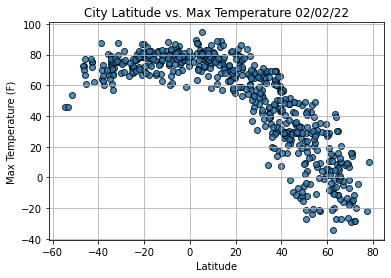

In [12]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

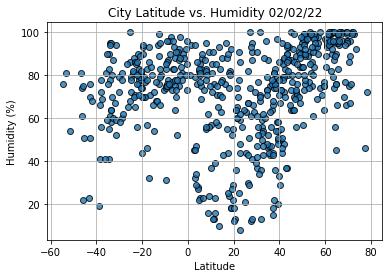

In [13]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

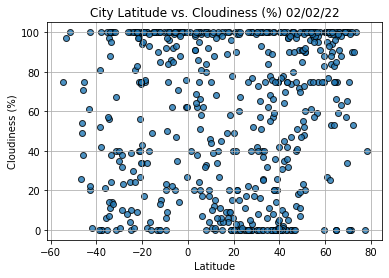

In [14]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

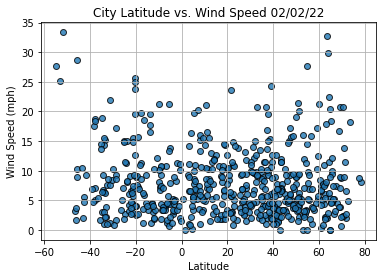

In [15]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()